In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8)

def kmeans(x,k,colores,dim):
    kmeans = KMeans(n_clusters=k).fit(X)
    centroids = kmeans.cluster_centers_
    print("\t~~~~centroides~~~~")
    print(centroids)
    labels = kmeans.predict(X)
    print("\t~~~~Etiquetas~~~~")
    print(labels)
    # Getting the cluster centers
    C = kmeans.cluster_centers_
    print(C.shape, "shape")
    asignar=[]
    for row in labels:
        asignar.append(colores[row])
    fig = plt.figure()
    if dim == 3:
        ax = Axes3D(fig)
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
        ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000) #centroides 
    elif dim ==2:
        plt.scatter(X[:, 0], X[:, 1], c=asignar, s=70)
        plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
        plt.show()

In [3]:
def testClusters(limit,X):
    Nc = range(1, limit)
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
    plt.plot(Nc,score)
    plt.xlabel('Numero de clusters')
    plt.ylabel('Y')
    plt.title('X')
    plt.show()

In [4]:
#Procesando data de PRUEBA
dataframe = pd.read_csv(r"analisis.csv")

colores=['red','green','blue','cyan']
X = np.array(dataframe[["op","ex","ag"]])


In [5]:
#Processando 2
dataframe = pd.read_csv(r"caracteristicas.csv")
dataframe.describe()
X = np.array(dataframe[["price","accommodates","cleaning_fee"]])

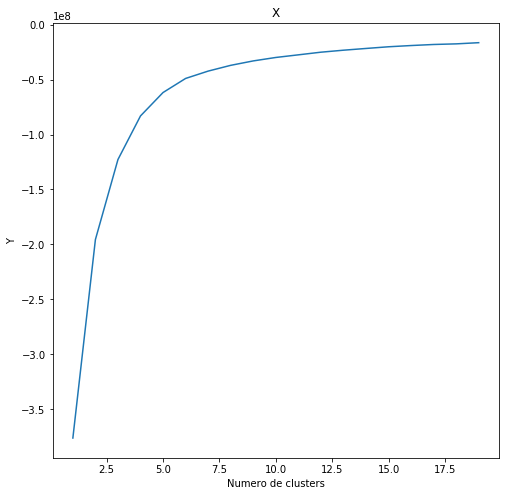

In [6]:
testClusters(20,X)

	~~~~centroides~~~~
[[  82.20349827    2.7785976    31.61560291]
 [ 533.99721836    6.76216968  114.31154381]
 [ 209.89731785    4.68354684   66.81445156]
 [1724.41666667    8.72222222  138.36111111]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 3) shape


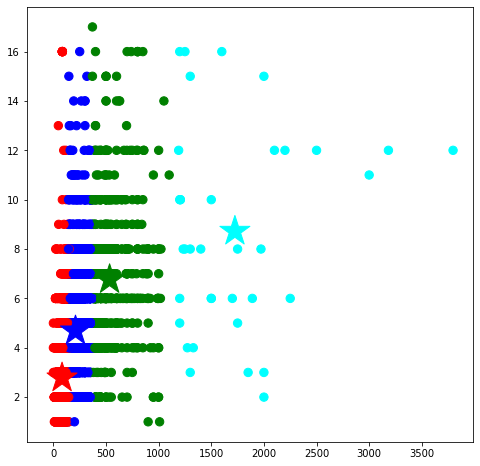

In [7]:
kmeans(X,4,colores,2)

	~~~~centroides~~~~
[[ 207.77827352    4.64830262   66.06168768]
 [ 533.12724758    6.75656985  113.96957123]
 [1724.41666667    8.72222222  138.36111111]
 [  81.65412634    2.77167239   31.52195858]]
	~~~~Etiquetas~~~~
[3 3 3 ... 1 3 3]
(4, 3) shape


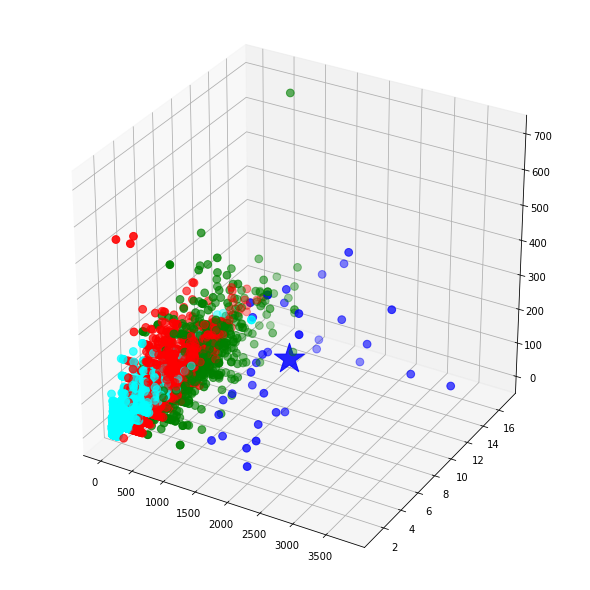

In [8]:
kmeans(X,4,colores,3)

In [9]:
import pickle
infile = open('todo2.pk','rb')
data_re = pickle.load(infile)
infile.close()
print(data_re)
data_re.shape

[[ 25.697937   26.245932   15.639372 ]
 [ 31.650875   37.286427   14.115054 ]
 [ 33.27471    37.754753   17.931547 ]
 ...
 [  8.148474   25.112816   11.046517 ]
 [ 62.564636  113.046715   11.677751 ]
 [  6.594322   31.481724    3.1119385]]


(28856, 3)

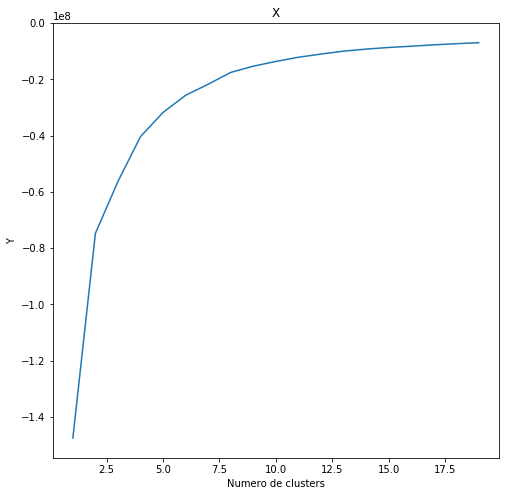

In [10]:
# data_re[:,:3].shape
X = data_re

testClusters(20,X)

In [11]:
pd.DataFrame(X).describe()

,0,1,2
count,28856.000000,28856.000000,28856.000000
mean,42.288124,43.642578,17.710718
std,52.941868,44.973824,16.945570
min,0.000000,0.000000,0.000000
25%,20.218490,25.079986,7.877437
50%,27.300785,33.042616,13.709252
75%,40.805862,47.617867,21.206112
max,1542.474609,2474.619629,350.280182


	~~~~centroides~~~~
[[ 25.912247  32.52237   12.656498]
 [247.19348   51.33461   48.08263 ]
 [276.98203  349.6963    90.34329 ]
 [ 76.15956   87.89511   36.15706 ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 0 3 0]
(4, 3) shape


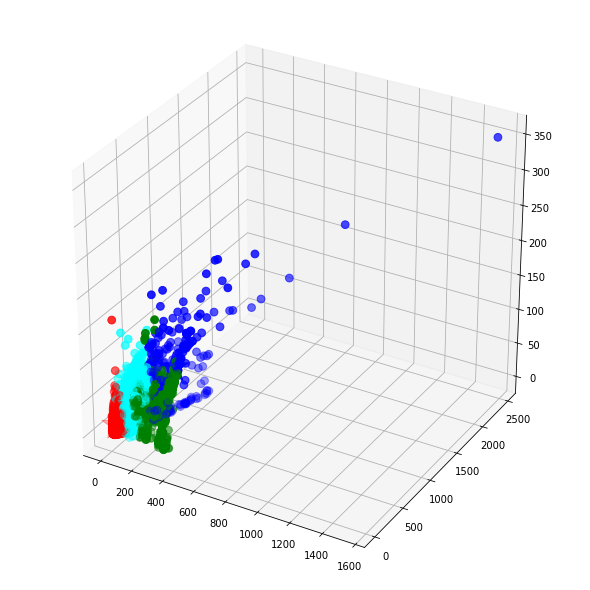

In [12]:
#Processando 3
# dataframe = pd.read_csv(r"caracteristicas.csv")
# dataframe.describe()
# X = np.array(dataframe[["price","accommodates","cleaning_fee"]])

kmeans(X,4,colores,3)

	~~~~centroides~~~~
[[ 30.521538  37.408066  14.814958]
 [311.669    388.91864   95.63722 ]
 [187.53595   97.06761   52.10537 ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 0 0 0]
(3, 3) shape


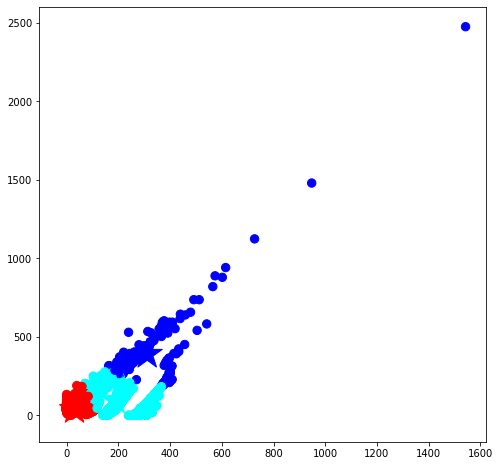

In [13]:
x1 = X[:,:2]

colores=['red','blue','cyan']
kmeans(x1,3,colores,2)

	~~~~centroides~~~~
[[356.60516  458.13245  110.2254  ]
 [ 30.697292  37.59379   14.902122]
 [193.51471  104.25383   53.160057]]
	~~~~Etiquetas~~~~
[1 1 1 ... 1 1 1]
(3, 3) shape


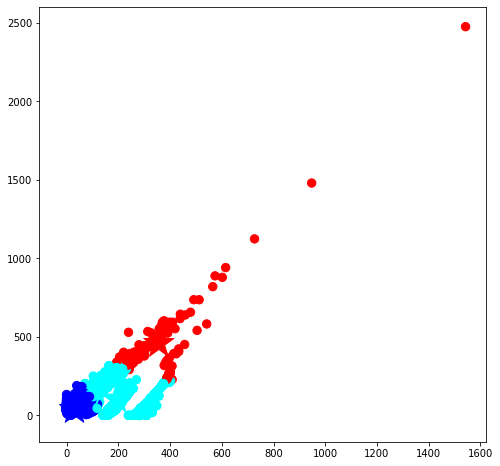

                  0             1             2
count  28856.000000  28856.000000  28856.000000
mean      42.288124     43.642578     17.710718
std       52.941868     44.973824     16.945570
min        0.000000      0.000000      0.000000
25%       20.218490     25.079986      7.877437
50%       27.300785     33.042616     13.709252
75%       40.805862     47.617867     21.206112
max     1542.474609   2474.619629    350.280182


,0,1
count,28856.000000,28856.000000
mean,43.642578,17.710718
std,44.973824,16.945570
min,0.000000,0.000000
25%,25.079986,7.877437
50%,33.042616,13.709252
75%,47.617867,21.206112
max,2474.619629,350.280182


In [14]:
x2 = X[:,1:3]

colores=['red','blue','cyan']
kmeans(x2,3,colores,2)
print(pd.DataFrame(X).describe())
pd.DataFrame(x2).describe()

	~~~~centroides~~~~
[[ 63.26596   68.037704  30.03804 ]
 [ 24.063477  30.813255  11.75223 ]
 [393.43652  520.8534   117.373665]
 [258.86414   57.14686   48.983036]
 [144.00046  191.32011   62.05979 ]]
	~~~~Etiquetas~~~~
[1 1 1 ... 1 0 1]
(5, 3) shape


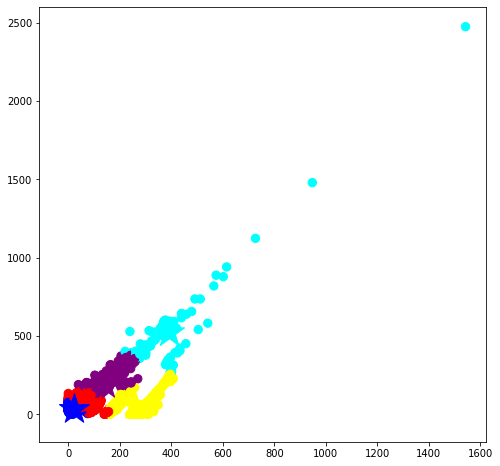

In [15]:
x1 = X[:,0:2]

colores=['red','blue','cyan','yellow','purple']
kmeans(x1,5,colores,2)